# Prototype


### First data proccesing into pandas or numpy 

In [10]:
#last working version was 4 days from 30th
import pandas as pd 
import numpy as np

In [11]:
#convert the excelt data into a data frame
df = pd.read_excel("annotations.xlsx",index_col=0 )
#drop all columns except for sentence and it's political leaning (type)
df.drop(df.columns.difference(["text","type"]), 1, inplace=True)
#count all the instances of each political leaning
distrub = df['type'].value_counts(normalize=True)
print(distrub)
#create a one hot encoding by political leaning
one_hot = pd.get_dummies(df["type"])
#drop the type column
df = df.drop("type",axis = 1)
#add the one hot encoding to the main data frame
df = df.join(one_hot)

print(df)

left      0.407539
right     0.406864
center    0.185598
Name: type, dtype: float64
                                                    text  center  left  right
0      The transgender effort to suppress any recogni...       0     0      1
1      Radical Virginia Citizens Defense League has o...       0     1      0
2      Miller is the architect of President Donald Tr...       0     1      0
3      The House Democrats’ 1,400-page coronavirus re...       0     0      1
4      A specter is haunting the West; our elites see...       0     0      1
...                                                  ...     ...   ...    ...
22466  Oregon first graders could attend gun safety c...       1     0      0
22467  But President Donald Trump and his campaign ad...       0     1      0
22468  The normalization effort included softened rhe...       1     0      0
22469  And so, while demonstrations began to spread a...       0     1      0
22470  House and Senate Democrats are responding to t...  

C:\Users\mrimb\AppData\Local\Temp/ipykernel_2728/123316559.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(["text","type"]), 1, inplace=True)


### Exploratory data analysis 

In [16]:
#numerical data anaylisis on the type
print("--Distribution of Political Bias--")
print("Percentage Distrubtuion")
print(distrub * 100) 

center = df['center'].value_counts() #we use post one-hot encoded dataset 
# print(center)
left = df['left'].value_counts()
# print(left)
right = df['right'].value_counts()
# print(right)



--Distribution of Political Bias--
Percentage Distrubtuion
left      40.753868
right     40.686357
center    18.559775
Name: type, dtype: float64


--WORD PER SENTENCE AVGS--
Left word count average:  33.95416896742132
Center word count average:  33.250552638850515
Right word count average:  32.545768805309734
Total word count average:  33.42632911392405


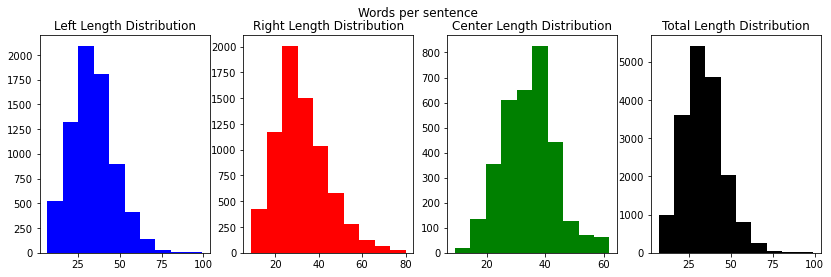

In [17]:
import matplotlib.pyplot as plt
#Text anaylsis on the body of the text 
print("--WORD PER SENTENCE AVGS--")

#create a word count column that contains the corresponding word count for each sentence
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

#identify the word count based on the political leaning 
print("Left word count average: ", df[df['left']==1]['word_count'].mean()) #left
print("Center word count average: ", df[df['center']==0]['word_count'].mean()) #center
print("Right word count average: ", df[df['right']==1]['word_count'].mean()) #right
print("Total word count average: ", df['word_count'].mean()) #Total
# print(df)

#distribution graphs of the word counts in each political leaning
fig,(leftAx,RightAx,CenterAx,TotalAx)=plt.subplots(1,4,figsize=(14,4))

#the word count for left leaning articles
lefty=df[df['left']==1]['word_count']
#create a histogram 
leftAx.hist(lefty,color='blue')
leftAx.set_title('Left Length Distribution')

righty=df[df['right']==1]['word_count']
RightAx.hist(righty,color='red')
RightAx.set_title('Right Length Distribution')

centery=df[df['center']==1]['word_count']
CenterAx.hist(centery,color='green')
CenterAx.set_title('Center Length Distribution')

#the distribution for word counts across all political leanings
totally=df['word_count']
TotalAx.hist(totally,color='black')
TotalAx.set_title('Total Length Distribution')
fig.suptitle('Words per sentence')

#display the graph 
plt.show()


In [18]:
#reverting back to orginial one hoted encoded dataframe by removing word count
df = df.drop(columns=["word_count"])
print(df)

                                                    text  center  left  right
0      The transgender effort to suppress any recogni...       0     0      1
1      Radical Virginia Citizens Defense League has o...       0     1      0
2      Miller is the architect of President Donald Tr...       0     1      0
3      The House Democrats’ 1,400-page coronavirus re...       0     0      1
4      A specter is haunting the West; our elites see...       0     0      1
...                                                  ...     ...   ...    ...
22466  Oregon first graders could attend gun safety c...       1     0      0
22467  But President Donald Trump and his campaign ad...       0     1      0
22468  The normalization effort included softened rhe...       1     0      0
22469  And so, while demonstrations began to spread a...       0     1      0
22470  House and Senate Democrats are responding to t...       0     0      1

[17775 rows x 4 columns]


### Model Prototype 

In [31]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
from sklearn.model_selection import train_test_split
X = df.iloc[:,0]
Y = df.iloc[:, 1:4]


df_right  = df[df['right']==1]
df_center = df[df['center']==1]
df_left   = df[df['left']==1]

# print(df_right)
# print(df_center)
# print(df_left)

#downsample the left and right data frames to match the size of center (the smallest category)
df_right_downsampled = df_right.sample(df_center.shape[0])
df_left_downsampled = df_left.sample(df_center.shape[0])

# print(df_right_downsampled)
# print(df_left_downsampled)

#join together the dataframes of the downsampled categories
df_balanced = pd.concat([df_center, df_left_downsampled, df_right_downsampled])


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state=5)
# print(y_train)


In [ ]:

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")



In [ ]:

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

model = tf.keras.Model(inputs=[text_input], outputs = [l])

model.summary()

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)


Possible Additional Pre-proccesing to explore: (see results after building the models and see if any helps)
- Stemming 
- Lemiilzations 
- stop word removal 

Possible Prototypes --> tokenization/
- less preferably a BOW model like inverse doc frequency 
- word2vec for word embeddings 
- preferbly will try a bert word embeding/vectorization  (we can use a much smaller model like distl-bert or another mini-bert type model if training time is too much)

for main model 

- see accuracy for naive bayes, svm, logistic regression 
- see how a convletional layer helps 
- NOt really sure how to actaully build the models do we need LSTM? Do we need a dense Layer? Which activation funcs should we use? (also how are we gonna train it in terms of compute power and time to train)

For hyperparameter tuning 
- gridsearch 
- random search 
- by hand delegated to each of the team memebers - 
- (how and if we can do k-fold cross validation on our dataset?)

Types of output we should look at 
- confusion matrix 
- put in plain old predications by hand 
- accuracy
- roc curve 